# ImPress Graphs

This artifact enables recreation of Figures 3, 5, and 13.

### Figure 3

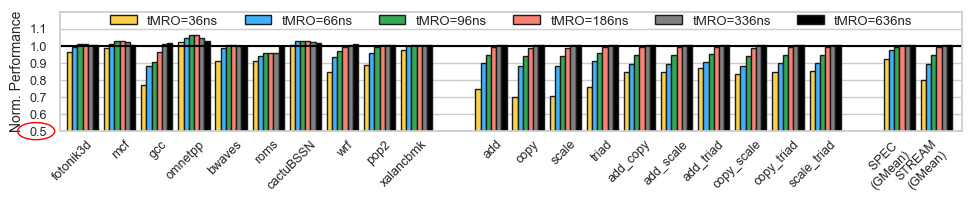

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
import matplotlib.patches as mpatches
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["tMRO=36ns", "tMRO=66ns", "tMRO=96ns", "tMRO=186ns", "tMRO=336ns", "tMRO=636ns"]
                               
#Color Palette
colors = ['#FBD148','#3DB2FF','#34a853', 'salmon', 'grey', 'black']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='9.5')

# Read Dataframe
df = pd.read_csv("./data/mro_sensitivity_mop_gs8.csv", delimiter=r'\s+')
#print (df)

# Format for Slowdown (%) ensure 0s stay 0s.
# for i in ['4K','2K','1K']:
#     slowdown_df = df.copy()
#     slowdown_df.loc[slowdown_df[i] == 0, i] = 1
#     slowdown_df[i] = slowdown_df[i]-1
# print (slowdown_df)

# Set position of bar on X axis
#barwidth
barWidth = 0.14

r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

#Create Plot
fig = plt.figure(figsize=(10,2.1))
ax = plt.gca()
#Bars
plt.bar(r1, df['suite1'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')
plt.bar(r2, df['suite2'], width = barWidth, color=colors[1], label=legends[1],edgecolor='k')
plt.bar(r3, df['suite3'], width = barWidth, color=colors[2],label=legends[2],edgecolor='k')
plt.bar(r4, df['suite4'], width = barWidth, color=colors[3],label=legends[3],edgecolor='k')
plt.bar(r5, df['suite5'], width = barWidth, color=colors[4],label=legends[4],edgecolor='k')
plt.bar(r6, df['suite6'], width = barWidth, color=colors[5],label=legends[5],edgecolor='k')

#Y=1 Black Line
ax.plot([-0.75,len(df.index)+0.25], [1,1],lw=1.5,color='black')

# ax.annotate("T=64", xy=(0, 0.1), xytext=(0.05, 0.89), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom', weight='bold',
#             bbox=dict(boxstyle='square', fc='white', edgecolor='black'))

# Add xticks on the middle of the group bars
plt.xticks([(r+barWidth*5) for r in range(len(df.index))], df['workload'])
ax.set_xlim(-0.25,len(df.index)+0.05)
plt.xticks(rotation = 45,ha='right')

ax.tick_params(axis='x', which='major', labelsize=8)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if ((tick_str == "LIGRA") or (tick_str == "LOW-RBL") or \
       (tick_str == "SPEC-GM") or (tick_str == "HIGH-RBL") or \
        (tick_str == "SPATIAL") or (tick_str == "STREAM-GM")):
        tick.label1.set_weight('bold')
    if (tick_str == "0" or tick_str == "0.0"):
        tick.set_visible(False)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[22] = 'SPEC \n(GMean)'
labels[23] = 'STREAM\n(GMean)'

ax.set_xticklabels(labels)
#Add Y-axes labels
plt.ylabel('Norm. Performance', size=10)
ax.tick_params(axis='y', which='major', labelsize=9)
ax.tick_params(axis='x', which='major', labelsize=9)

#Set Y format & limts
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
ax.set_ylim(0.75,1.2)
ax.tick_params(axis='x', which='major', pad=-1)
ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1])

#grid
ax.axis('on')
ax.xaxis.grid()

#Legend
leg_handles=[]
for i in range(0,6):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,0.92),frameon=False,loc='center',ncol=6,prop={'size':9.5})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')
ax.add_patch(mpatches.Ellipse((-0.9,0.5), width=1, height=0.1, color='red', fill=False, clip_on=False))


#Figure
plt.tight_layout()
fig.savefig("./outputs/mro_sensitivity_mop_gs8.pdf",bbox_inches='tight')
plt.show()


### Figure 5

[0.23, 2.3000000000000003, 0.23, 2.3000000000000003, 2.3000000000000003, 0.23, 2.3000000000000003, 0.23]


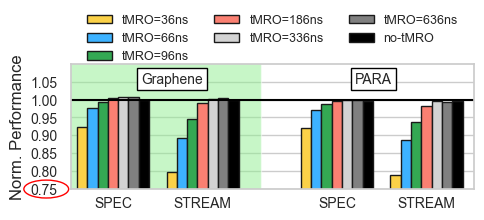

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
import matplotlib.patches as mpatches

#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# legends = ["36ns", "66ns", "96ns", "186ns", "336ns", "636ns"]
legends = ["tMRO=36ns", "tMRO=66ns", "tMRO=96ns", "tMRO=186ns", 
           "tMRO=336ns", "tMRO=636ns", "no-tMRO"]

#Color Palette
colors = ['#FBD148','#3DB2FF','#34a853', 'salmon',
          'lightgrey', 'grey', 'black']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='12')

# Read Dataframe
df = pd.read_csv("./data/mg_para_mro_sens_mop_gs8.csv", delimiter=r'\s+')

# # Set position of bar on X axis
# #barwidth
# barWidth = 0.45
# r1 = np.arange(len(df.index))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]

#Create Plot
fig = plt.figure(figsize=(5,2.5))
ax = plt.gca()

ax.fill_between(np.arange(-1,4.5, step=0.5), np.full(11, 1.61), facecolor='lightgreen', alpha=0.5)
# ax.fill_between(np.arange(2.25,5.5, step=0.25), np.full(13, 1.61), facecolor='khaki', alpha=0.5)

barWidth = 0.23
r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

# df['ideal'] = (1/df['ideal'] - 1)
# df['start_d'] = (1/df['start_d'] - 1)
print([barWidth if val > 0.01 else 10*barWidth for val in df['36ns']])
#Bars
plt.bar(r1, df['36ns'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')
# plt.bar(r2, df['start_s'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')
plt.bar(r2, df['66ns'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')
plt.bar(r3, df['96ns'], width = barWidth, color=colors[2],label=legends[2],edgecolor='k')
plt.bar(r4, df['186ns'], width = barWidth, color=colors[3],label=legends[3],edgecolor='k')
plt.bar(r5, df['336ns'], width = barWidth, color=colors[4],label=legends[4],edgecolor='k')
plt.bar(r6, df['636ns'], width = barWidth, color=colors[5],label=legends[5],edgecolor='k')
plt.bar(r7, df['no_mro'], width = barWidth, color=colors[6],label=legends[6],edgecolor='k')

# #Y=1 Black Line
ax.plot([-1,len(df.index)+1], [1,1],lw=1.5,color='black')

# Add xticks on the middle of the group bars
# df.at[34,'Expts'] = " "
plt.xticks([(r+barWidth*3) for r in range(len(df.index))], df['Config'])
ax.set_xlim(-0.25,len(df.index)+0.75)
# plt.xticks(rotation = 0,ha='right',fontsize=10)

ax.tick_params(axis='x', which='major', labelsize=10)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if( (tick_str == "0")):
        tick.set_visible(False)


#Add Y-axes labels
plt.ylabel('Norm. Performance', size=12)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.tick_params(axis='x', which='major', pad=-1, labelsize=10)
#Set Y format & limts
# ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
ax.set_ylim(0.75, 1.1)
ax.set_yticks([0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05])



#grid
ax.axis('on')
ax.xaxis.grid()
ax.annotate('Graphene', xy=(0, 0.1), xytext=(0.25, 0.82), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))
ax.annotate('PARA', xy=(0, 0.4), xytext=(0.75, 0.82), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))


# ax.annotate('24MB LLC', xy=(0, 0.8), xytext=(0.82, 0.82), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             bbox=dict(boxstyle='square', fc='white', edgecolor='black'))

# ax.annotate('186KB', xy=(0.395, 0.1), xytext=(0.395, 0.25), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))
# ax.annotate('544KB', xy=(0.48, 0.1), xytext=(0.48, 0.4), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))
# ax.annotate('1.3MB', xy=(0.56, 0.3), xytext=(0.56, 0.55), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))
#Legend
leg_handles=[]
for i in range(0,7):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,1.2),frameon=False,loc='center',ncol=3,prop={'size':9})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')

ax.add_patch(mpatches.Ellipse((-0.8,0.75), width=1, height=0.05, color='red', fill=False, clip_on=False))

#Figure
plt.tight_layout()
fig.savefig("./outputs/para_mg_mro_sensitivity.pdf",bbox_inches='tight')
plt.show()

### Impress-P: MG

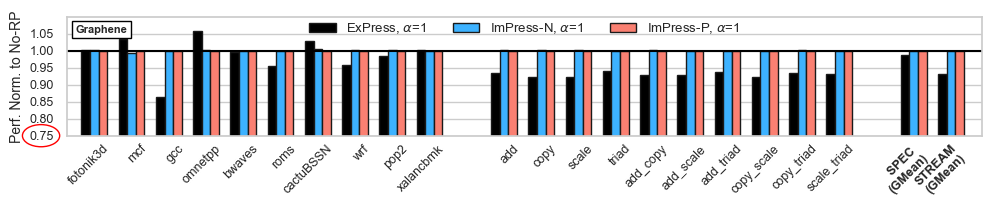

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
import matplotlib.patches as mpatches
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["ExPress, $\\alpha$=1", "ImPress-N, $\\alpha$=1",  "ImPress-P, $\\alpha$=1"]
                               
#Color Palette
colors = ['black', '#3DB2FF', 'salmon']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='9.5')

# Read Dataframe
df = pd.read_csv("./data/mg_ip.csv", delimiter=r'\s+')
#print (df)

# Format for Slowdown (%) ensure 0s stay 0s.
# for i in ['4K','2K','1K']:
#     slowdown_df = df.copy()
#     slowdown_df.loc[slowdown_df[i] == 0, i] = 1
#     slowdown_df[i] = slowdown_df[i]-1
# print (slowdown_df)

# Set position of bar on X axis
#barwidth
barWidth = 0.23

r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
# r5 = [x + barWidth for x in r4]
# r6 = [x + barWidth for x in r5]

#Create Plot
fig = plt.figure(figsize=(10,2.1))
ax = plt.gca()
#Bars
plt.bar(r1, df['exp_alpha100'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')
plt.bar(r2, df['id_alpha100'], width = barWidth, color=colors[1], label=legends[1],edgecolor='k')
plt.bar(r3, df['ip'], width = barWidth, color=colors[2], label=legends[2],edgecolor='k')
# plt.bar(r4, df['id_alpha100'], width = barWidth, color=colors[3],label=legends[3],edgecolor='k')
# plt.bar(r4, df['suite4'], width = barWidth, color=colors[3],label=legends[3],edgecolor='k')
# plt.bar(r5, df['suite5'], width = barWidth, color=colors[4],label=legends[4],edgecolor='k')
# plt.bar(r6, df['suite6'], width = barWidth, color=colors[5],label=legends[5],edgecolor='k')

#Y=1 Black Line
ax.plot([-0.75,len(df.index)+0.25], [1,1],lw=1.5,color='black')

ax.annotate("Graphene", xy=(0, 0.1), xytext=(0.0375, 0.85), xycoords='axes fraction',
            fontsize=8, ha='center', va='bottom', weight='bold',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))

# Add xticks on the middle of the group bars
plt.xticks([(r+barWidth*3) for r in range(len(df.index))], df['workload'])
ax.set_xlim(-0.5,len(df.index)+0.05)
plt.xticks(rotation = 45,ha='right')

ax.tick_params(axis='x', which='major', labelsize=8)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if ((tick_str == "LIGRA") or (tick_str == "SPEC-GM") or \
       (tick_str == "PARSEC") or (tick_str == "STREAM-GM") or \
        (tick_str == "OTHERS") or (tick_str == "ALL")):
        tick.label1.set_weight('bold')
        tick.label1.set_fontsize(3)
    if (tick_str == "0" or tick_str == "0.0"):
        tick.set_visible(False)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[22] = 'SPEC \n(GMean)'
labels[23] = 'STREAM\n(GMean)'

ax.set_xticklabels(labels)


#Add Y-axes labels
plt.ylabel('Perf. Norm. to No-RP', size=10)
ax.tick_params(axis='y', which='major', labelsize=9)
ax.tick_params(axis='x', which='major', labelsize=9)

#Set Y format & limts
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
ax.set_ylim(0.75,1.1)
ax.tick_params(axis='x', which='major', pad=-1)
ax.set_yticks([0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05])

#grid
ax.axis('on')
ax.xaxis.grid()

#Legend
leg_handles=[]
for i in range(0,3):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,0.9),frameon=False,loc='center',ncol=6,prop={'size':9.5})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')

ax.add_patch(mpatches.Ellipse((-1.2,0.75), width=1, height=0.065, color='red', fill=False, clip_on=False))

#Figure
plt.tight_layout()
fig.savefig("./outputs/mg_ip.pdf",bbox_inches='tight')
plt.show()


### Impress-P: PARA

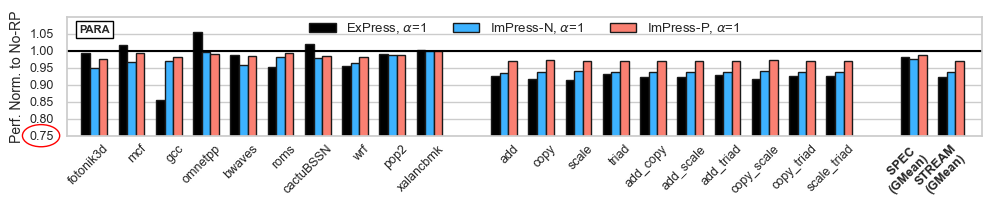

In [437]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
import matplotlib.patches as mpatches
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["ExPress, $\\alpha$=1", "ImPress-N, $\\alpha$=1",  "ImPress-P, $\\alpha$=1"]
                               
#Color Palette
colors = ['black', '#3DB2FF', 'salmon']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='9.5')

# Read Dataframe
df = pd.read_csv("./data/para_ip.csv", delimiter=r'\s+')
#print (df)

# Format for Slowdown (%) ensure 0s stay 0s.
# for i in ['4K','2K','1K']:
#     slowdown_df = df.copy()
#     slowdown_df.loc[slowdown_df[i] == 0, i] = 1
#     slowdown_df[i] = slowdown_df[i]-1
# print (slowdown_df)

# Set position of bar on X axis
#barwidth
barWidth = 0.23

r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
# r5 = [x + barWidth for x in r4]
# r6 = [x + barWidth for x in r5]

#Create Plot
fig = plt.figure(figsize=(10,2.1))
ax = plt.gca()
#Bars
plt.bar(r1, df['exp_alpha100'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')
plt.bar(r2, df['id_alpha100'], width = barWidth, color=colors[1], label=legends[1],edgecolor='k')
plt.bar(r3, df['ip'], width = barWidth, color=colors[2], label=legends[2],edgecolor='k')
# plt.bar(r4, df['id_alpha100'], width = barWidth, color=colors[3],label=legends[3],edgecolor='k')
# plt.bar(r4, df['suite4'], width = barWidth, color=colors[3],label=legends[3],edgecolor='k')
# plt.bar(r5, df['suite5'], width = barWidth, color=colors[4],label=legends[4],edgecolor='k')
# plt.bar(r6, df['suite6'], width = barWidth, color=colors[5],label=legends[5],edgecolor='k')

#Y=1 Black Line
ax.plot([-0.75,len(df.index)+0.25], [1,1],lw=1.5,color='black')

ax.annotate("PARA", xy=(0, 0.1), xytext=(0.03, 0.85), xycoords='axes fraction',
            fontsize=8, ha='center', va='bottom', weight='bold',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))

# Add xticks on the middle of the group bars
plt.xticks([(r+barWidth*3) for r in range(len(df.index))], df['workload'])
ax.set_xlim(-0.5,len(df.index)+0.05)
plt.xticks(rotation = 45,ha='right')

ax.tick_params(axis='x', which='major', labelsize=8)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if ((tick_str == "LIGRA") or (tick_str == "SPEC-GM") or \
       (tick_str == "PARSEC") or (tick_str == "STREAM-GM") or \
        (tick_str == "OTHERS") or (tick_str == "ALL")):
        tick.label1.set_weight('bold')
    if (tick_str == "0" or tick_str == "0.0"):
        tick.set_visible(False)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[22] = 'SPEC \n(GMean)'
labels[23] = 'STREAM\n(GMean)'

ax.set_xticklabels(labels)
#Add Y-axes labels
plt.ylabel('Perf. Norm. to No-RP', size=10)
ax.tick_params(axis='y', which='major', labelsize=9)
ax.tick_params(axis='x', which='major', labelsize=9)

#Set Y format & limts
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
ax.set_ylim(0.75,1.1)
ax.tick_params(axis='x', which='major', pad=-1)
ax.set_yticks([0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05])

#grid
ax.axis('on')
ax.xaxis.grid()

#Legend
leg_handles=[]
for i in range(0,3):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,0.9),frameon=False,loc='center',ncol=6,prop={'size':9.5})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')

ax.add_patch(mpatches.Ellipse((-1.2,0.75), width=1, height=0.065, color='red', fill=False, clip_on=False))

#Figure
plt.tight_layout()
fig.savefig("./outputs/para_ip.pdf",bbox_inches='tight')
plt.show()


### Impress-P: RFM

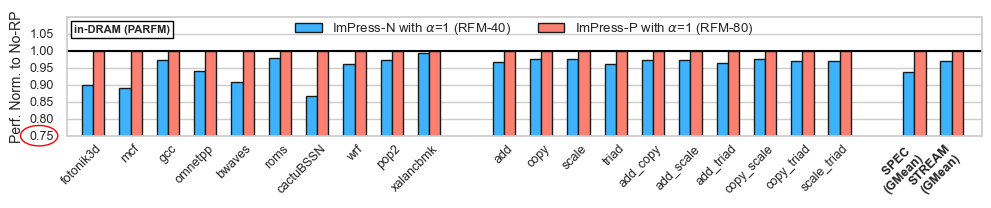

In [439]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
import matplotlib.patches as mpatches
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["No-RP (RFM-80)", "ImPress-N with $\\alpha$=1 (RFM-40)", "ImPress-P with $\\alpha$=1 (RFM-80)"]
                               
#Color Palette
colors = ['black', '#3DB2FF', 'salmon']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='9.5')

# Read Dataframe
df = pd.read_csv("./data/raa_ip.csv", delimiter=r'\s+')
#print (df)

# Format for Slowdown (%) ensure 0s stay 0s.
# for i in ['4K','2K','1K']:
#     slowdown_df = df.copy()
#     slowdown_df.loc[slowdown_df[i] == 0, i] = 1
#     slowdown_df[i] = slowdown_df[i]-1
# print (slowdown_df)

# Set position of bar on X axis
#barwidth
barWidth = 0.3

r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
# r5 = [x + barWidth for x in r4]
# r6 = [x + barWidth for x in r5]

#Create Plot
fig = plt.figure(figsize=(10,2.1))
ax = plt.gca()

df['th80'] = df['th80'] / df['th80']
df['th40'] = df['th40'] / df['th80']
df['th80'] = df['th80'] / df['th80']

#Bars
# plt.bar(r1, df['th80'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')
plt.bar(r2, df['th40'], width = barWidth, color=colors[1], label=legends[1],edgecolor='k')
plt.bar(r3, df['th80'], width = barWidth, color=colors[2], label=legends[2],edgecolor='k')
# plt.bar(r3, df['id_alpha100'], width = barWidth, color=colors[2], label=legends[2],edgecolor='k')
# plt.bar(r4, df['id_alpha100'], width = barWidth, color=colors[3],label=legends[3],edgecolor='k')
# plt.bar(r4, df['suite4'], width = barWidth, color=colors[3],label=legends[3],edgecolor='k')
# plt.bar(r5, df['suite5'], width = barWidth, color=colors[4],label=legends[4],edgecolor='k')
# plt.bar(r6, df['suite6'], width = barWidth, color=colors[5],label=legends[5],edgecolor='k')

#Y=1 Black Line
ax.plot([-0.75,len(df.index)+0.25], [1,1],lw=1.5,color='black')

ax.annotate("in-DRAM (PARFM)", xy=(0, 0.1), xytext=(0.06, 0.85), xycoords='axes fraction',
            fontsize=8, ha='center', va='bottom', weight='bold',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))

# Add xticks on the middle of the group bars
plt.xticks([(r+barWidth*2.5) for r in range(len(df.index))], df['workload'])
ax.set_xlim(-0.25,len(df.index)+0.25)
plt.xticks(rotation = 45,ha='right')

ax.tick_params(axis='x', which='major', labelsize=8)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if ((tick_str == "LIGRA") or (tick_str == "SPEC") or \
       (tick_str == "PARSEC") or (tick_str == "STREAM") or \
        (tick_str == "OTHERS") or (tick_str == "ALL")):
        tick.label1.set_weight('bold')
    if (tick_str == "0" or tick_str == "0.0"):
        tick.set_visible(False)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[22] = 'SPEC \n(GMean)'
labels[23] = 'STREAM\n(GMean)'

ax.set_xticklabels(labels)
#Add Y-axes labels
plt.ylabel('Perf. Norm. to No-RP', size=10)
ax.tick_params(axis='y', which='major', labelsize=9)
ax.tick_params(axis='x', which='major', labelsize=9)

#Set Y format & limts
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
ax.set_ylim(0.75,1.1)
ax.tick_params(axis='x', which='major', pad=-1)
ax.set_yticks([0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05])

#grid
ax.axis('on')
ax.xaxis.grid()

#Legend
leg_handles=[]
for i in range(1,3):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,0.9),frameon=False,loc='center',ncol=6,prop={'size':9.5})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')
ax.add_patch(mpatches.Ellipse((-1,0.75), width=1, height=0.06, color='red', fill=False, clip_on=False))


#Figure
plt.tight_layout()
fig.savefig("./outputs/raa_ip.pdf",bbox_inches='tight')
plt.show()
